In [ ]:
# Importing Essential Libraries
# numpy: For numerical operations and array manipulations
# pandas: For data manipulation and analysis using DataFrames
# train_test_split: From sklearn to split data into training and testing sets
# datasets: Scikit-learn's built-in datasets module to access sample datasets like Iris
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import datasets

In [ ]:
# Loading the Iris dataset and exploring its structure
# a: Contains the entire Iris dataset as a scikit-learn Bunch object
# q: Creates a pandas DataFrame from the feature data with appropriate column names
a=datasets.load_iris()
q = pd.DataFrame(a.data, columns=a.feature_names)
# Display the available keys in the Iris dataset (data, target, feature_names, etc.)
print(a.keys())
# Display the names of the target classes (setosa, versicolor, virginica)
print(a.target_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['setosa' 'versicolor' 'virginica']


In [ ]:
# Loading the Iris dataset in a more direct format
# return_X_y=True: Returns features (X) and target values (y) separately
# as_frame=True: Returns X and y as pandas DataFrames instead of numpy arrays
X,y = datasets.load_iris(return_X_y=True,as_frame=True)
# Printing the full description of the Iris dataset to understand its background and attributes
print(datasets.load_iris()["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
# Displaying the features DataFrame (X) to examine the measurements of iris flowers
# This shows all rows with measurements of sepal length, sepal width, petal length, and petal width
print(X)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [ ]:
# Displaying the distribution of target classes in the dataset
# This shows how many samples belong to each iris species (0 = setosa, 1 = versicolor, 2 = virginica)
# value_counts() returns the count of each unique value in the target variable
print(y.value_counts())

target
0    50
1    50
2    50
Name: count, dtype: int64


In [ ]:
# Generating descriptive statistics for the features (X)
# describe() provides count, mean, std, min, 25%, 50%, 75%, and max for each measurement
# This helps understand the distribution and range of each feature
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Getting a concise summary of the features DataFrame
# info() displays the column data types, non-null values, and memory usage
# This helps identify any potential issues like missing values or incorrect data types
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
# Data preprocessing: Filtering and class adjustment
# X=X[50:]: Removing the first 50 samples (all 'setosa' flowers)
# y=y[50:] -1: Removing the first 50 samples from targets and shifting classes (2,1 → 1,0)
# This focuses the analysis on only versicolor and virginica species (binary classification)
X=X[50:]
y=y[50:] -1
# Combining features and target into a single DataFrame for easier analysis
# axis=1 means concatenation is done horizontally (column-wise)
all_variables = pd.concat([X,y], axis=1)
all_variables.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


In [ ]:
# Calculating the correlation matrix between all variables
# This shows how each feature correlates with other features and with the target
# High correlation values (close to 1 or -1) indicate strong relationships between variables
# This helps identify which features might be most predictive for classification
all_variables.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,0.553855,0.828479,0.593709,0.494305
sepal width (cm),0.553855,1.000000,0.519802,0.566203,0.308080
petal length (cm),0.828479,0.519802,1.000000,0.823348,0.786424
petal width (cm),0.593709,0.566203,0.823348,1.000000,0.828129
target,0.494305,0.308080,0.786424,0.828129,1.000000


<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

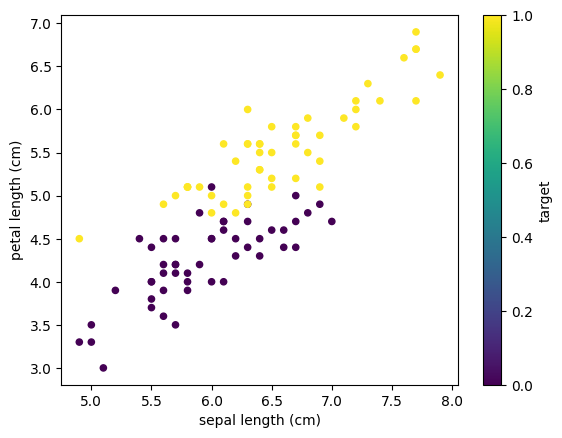

In [ ]:
# Creating a scatter plot to visualize the relationship between two features
# x="sepal length (cm)", y="petal length (cm)": The features being plotted on x and y axes
# c="target": Colors the points based on their target class (species)
# cmap='viridis': Specifies the colormap to use for the points
# This visualization helps identify if the classes are linearly separable based on these features
all_variables.plot.scatter(x="sepal length (cm)", y="petal length (cm)", c="target", cmap='viridis')

In [ ]:
# Preparing data for Logistic Regression model
# Splitting the dataset into training and testing sets
# X_train, y_train: Data used to train the model (67% of the data)
# X_test, y_test: Data reserved for testing the model's performance (33% of the data)
# test_size=0.33: Allocating 33% of the data for testing
# random_state=42: Setting a seed for reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Displaying the target values in the training set
# This shows the distribution of classes in our training data
# Useful to verify if the classes are balanced or imbalanced
y_train

78     0
143    1
55     0
116    1
115    1
      ..
110    1
121    1
64     0
142    1
101    1
Name: target, Length: 67, dtype: int32

In [ ]:
# Importing the Logistic Regression classifier from scikit-learn
# Logistic Regression is a statistical model used for binary classification problems
# It's a good baseline model for classification tasks due to its simplicity and interpretability
from sklearn.linear_model import LogisticRegression

In [ ]:
# Creating an instance of the LogisticRegression model with default parameters
# This initializes the model but doesn't train it yet
# Default parameters include:
# - C=1.0 (inverse of regularization strength)
# - solver='lbfgs' (algorithm for optimization)
# - max_iter=100 (maximum number of iterations for the solver)
log_reg = LogisticRegression()

In [ ]:
# Training the Logistic Regression model on the training data
# fit() method trains the model by:
# 1. Finding optimal coefficients for each feature
# 2. Minimizing the error between predicted and actual values
# After this step, the model has learned patterns from the training data
log_reg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# Making a prediction for a new, unseen flower sample
# new_flower contains measurements [sepal length, sepal width, petal length, petal width]
# log_reg.predict() uses the trained model to classify which species this new flower belongs to
# Returns either 0 (versicolor) or 1 (virginica) after the class adjustment done earlier
new_flower= [[6.5,2.8,7.1,1.5]]
log_reg.predict(new_flower)

c:\Users\hites\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
# Getting probability estimates for each class for the new flower
# predict_proba() returns probability estimates rather than class labels
# The output is a 2D array with shape (n_samples, n_classes)
# Each row sums to 1 and contains the probability of the sample belonging to each class
# [probability of class 0, probability of class 1]
log_reg.predict_proba(new_flower)

c:\Users\hites\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.00410586, 0.99589414]])

In [ ]:
# Making predictions on the test set to evaluate model performance
# Uses the trained logistic regression model to predict classes for all test samples
# y_pred will contain predicted class labels that we can compare with the true labels (y_test)
y_pred= log_reg.predict(X_test)

In [ ]:
# Calculating the accuracy manually
# sum(y_pred==y_test): Counts how many predictions match the true labels
# len(y_test): The total number of test samples
# The ratio gives the proportion of correctly classified samples (accuracy)
# This is a simple, manual way to calculate classification accuracy
accuracy= sum(y_pred==y_test)/len(y_test)

In [ ]:
# Displaying the calculated accuracy value
# This shows what proportion of test samples were correctly classified by our model
# Higher values (closer to 1.0) indicate better model performance
accuracy

0.9393939393939394

In [ ]:
# Using scikit-learn's built-in function to calculate accuracy
# from sklearn.metrics import accuracy_score: Importing the accuracy metric
# accuracy_score(y_test, y_pred): Computes the accuracy by comparing true labels with predicted labels
# This should give the same result as our manual calculation but is the standard way to calculate accuracy in sklearn
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9393939393939394